In [96]:
from tensorflow import keras
from keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as plt
import numpy as np

# Importing Data


In [97]:
numbers_data = pd.read_csv("train.csv")
X = numbers_data.copy()
y = X.pop('label')

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, train_size=0.9, random_state=42)

# Setting Up and Training the Model

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.6995 - loss: 1.0505 - val_accuracy: 0.9045 - val_loss: 0.3146
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accuracy: 0.9447 - loss: 0.1884 - val_accuracy: 0.9300 - val_loss: 0.2283
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 296ms/step - accuracy: 0.9581 - loss: 0.1311 - val_accuracy: 0.9567 - val_loss: 0.1523
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9665 - loss: 0.1050 - val_accuracy: 0.9619 - val_loss: 0.1246
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9737 - loss: 0.0840 - val_accuracy: 0.9664 - val_loss: 0.1234
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9777 - loss: 0.0660 - val_accuracy: 0.9698 - val_loss: 0.1114
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9804 - loss: 0.0579 - val_accuracy: 0.9695 - val_loss: 0.1134
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9819 - loss: 0.0512 - val_accuracy: 0.9707

<Axes: title={'center': 'Accuracy'}>

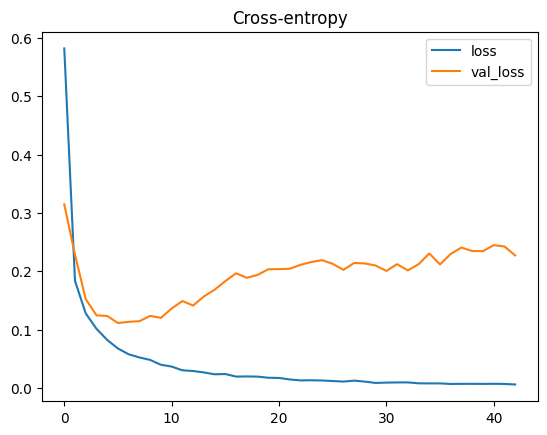

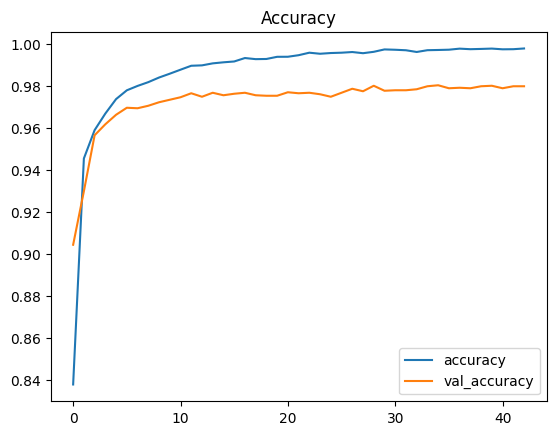

In [98]:
input_shape = [784]

model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.BatchNormalization(),
    
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(10, activation='softmax')
])

optimizer = keras.optimizers.SGD(
    learning_rate=0.05, momentum=0.9
)
model.compile(
    optimizer=optimizer,
    loss='Crossentropy',
    metrics=['accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=8, restore_best_weights=True, monitor="val_accuracy"
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=1024,
    epochs=50,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

# Quick Function for outputting numbers

In [99]:
def pick_highest(X):
    return np.argmax(X, axis=1)

# Training Model on Full Data With New Learning Rate

In [100]:
optimizer = keras.optimizers.SGD(
    learning_rate=0.005, momentum=0.9
)
history = model.fit(
    X, y,
    batch_size=512,
    epochs=20,
    callbacks=[early_stopping],
)
model.compile(
    optimizer=optimizer,
    loss='Crossentropy',
    metrics=['accuracy'],
)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9928 - loss: 0.0251
Epoch 2/20
 5/83 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9923 - loss: 0.0179

/Users/shawnwei/Documents/GitHub/mnist/.venv/lib/python3.9/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9922 - loss: 0.0227
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9828 - loss: 0.0707
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9835 - loss: 0.0577
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9798 - loss: 0.0806
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9778 - loss: 0.0797
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9566 - loss: 0.1958
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9756 - loss: 0.0886
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9857 - loss: 0.0408
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9889 - loss: 0.0330
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9910 - loss: 0.0283
Epoch 12/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9795 - loss: 0.0843
Epoch 13/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9910 - 

# Output Results

In [101]:


test_data = pd.read_csv("test.csv")
test_preds = pick_highest(model.predict(test_data))

output = pd.DataFrame({
    'ImageId': np.arange(1, len(test_preds) + 1),  
    #Google told me this
    'Label': test_preds
})

# output
# Create a submission file name with date and time appended
submission_file_name = f'submission_{pd.Timestamp.now().strftime("%Y-%m-%d_%H-%M-%S")}.csv'

# Save to csv file
output.to_csv(submission_file_name, index=False)
output

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
